# Visualization in Python

There are many python packages for visualization. We'll focus on capabilities available through pandas, and to a lesser extent, matplotlib. There is great documentation on all of this.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# The following ensures that the plots are in the notebook
%inline matplotlib
# We'll also use capabilities in numpy
import numpy as np

In [8]:
# The running example uses the pronto trip data
df = pd.read_csv("2015_trip_data.csv")
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971


Now let's consider the popularity of the stations.

In [9]:
from_counts = pd.value_counts(df.from_station_id)
to_counts = pd.value_counts(df.to_station_id)

Our initial task is comparison - which stations are most popular. A bar plot seems appropriate.

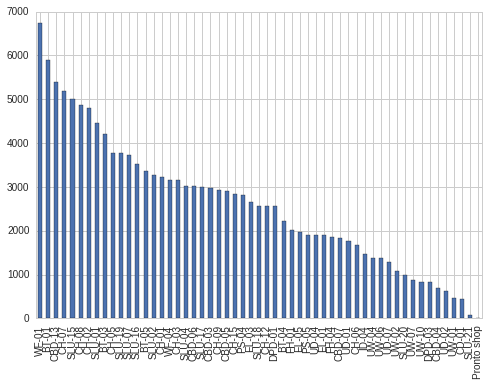

In [10]:
from_counts.plot.bar()

Now let's plot the to counts

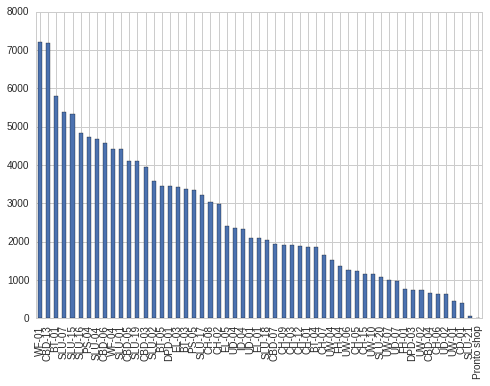

In [11]:
to_counts.plot.bar()

We want if there is a general movement of bikes from one station to another. That is, are from and to counts out of balance. This is a comparison task. One approach is to combine the two bar plots in the same figure.

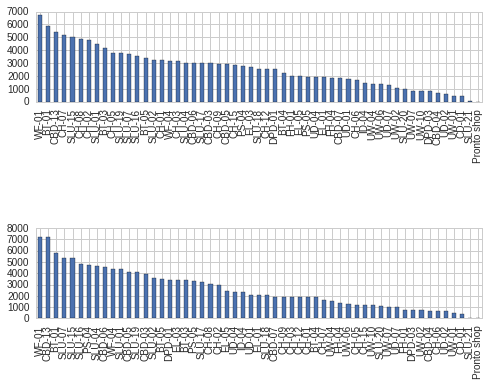

In [12]:
plt.subplot(3,1,1)
from_counts.plot.bar()
plt.subplot(3,1,3)
to_counts.plot.bar()
# Note the use of an empty second plot to provide space between the plots

But this is deceptive since the two plots have different x-axis. So, first we'll make sure that the counts are ordered consistently. Then, we'll re-do the plots.

In [21]:
count_list = [to_counts[x] for x in from_counts.index]
ordered_to_counts = pd.Series(count_list, index=from_counts.index)

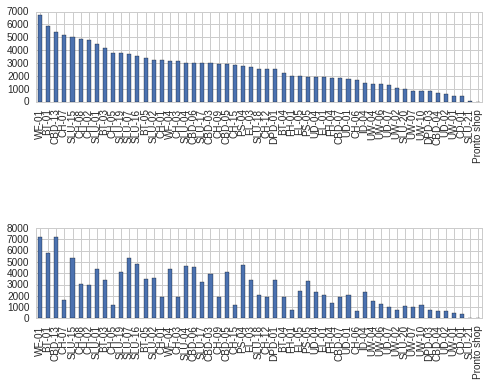

In [22]:
plt.subplot(3,1,1)
from_counts.plot.bar()
plt.subplot(3,1,3)
ordered_to_counts.plot.bar()

But this is awkward since it's difficult to find a specific station. Sorting in sequence is a good idea. And, we should probably use DataFrames since this provides a single representation for all of our data.

In [14]:
df_counts = pd.DataFrame({'from': from_counts.values, 'to': ordered_to_counts.values}, index=from_counts.index)
df_counts.head()

,from,to
WF-01,6742,7212
BT-01,5885,5800
CBD-13,5385,7189
CH-07,5190,1657
SLU-15,5006,5328


In [15]:
df_counts.sort_index(inplace=True)  # Modifies the calling dataframe
df_counts.head()

,from,to
BT-01,5885,5800
BT-03,4199,3386
BT-04,2221,1856
BT-05,3368,3459
CBD-03,2974,3959


To find the imbalance, compare the difference between "from" and "to"

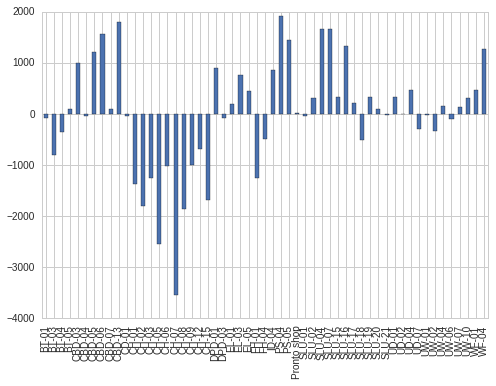

In [17]:
df_outflow = pd.DataFrame({'outflow':df_counts.to - df_counts['from']}, index=df_counts.index)
df_outflow.plot.bar(legend=False)

We can make this readable by only looking at stations with large outflows, either positive or negative.

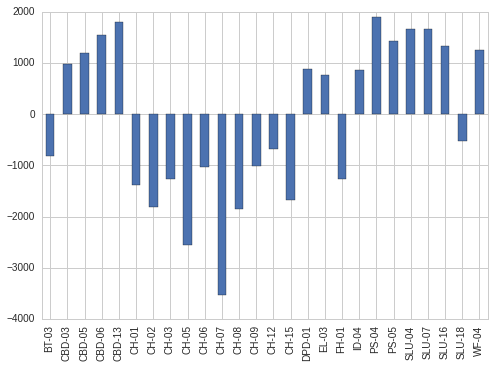

In [20]:
min_outflow = 500
sel = abs(df_outflow.outflow) > min_outflow
df_outflow_small = df_outflow[sel]
df_outflow_small.plot.bar(legend=False)

## In-class exercise
- Using the pronto data, explore comparisons & trends in # rides by TOD, DOW, Station, Month, membership, gender
- What idioms work best for the different kinds of trends

Work in teams of three
- One person in the team will give a 2 minute summary at end of class